# 映画レビューのデータセットを使って
1. 映画数の年推移
2. revenueの年推移を　plot してみる

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('../Pandas/dataset/tmdb_5000_movies.csv')

In [31]:
df.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,year
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,2009


In [4]:
release_date_sample = df['release_date'].iloc[0]

In [5]:
release_date_sample

'2009-12-10'

In [6]:
release_date_sample[:4]

'2009'

In [7]:
df['release_date']

0       2009-12-10
1       2007-05-19
2       2015-10-26
3       2012-07-16
4       2012-03-07
           ...    
4798    1992-09-04
4799    2011-12-26
4800    2013-10-13
4801    2012-05-03
4802    2005-08-05
Name: release_date, Length: 4803, dtype: object

In [8]:
def get_year(release_date):
    
    return release_date[:4]

In [9]:
get_year('2009-12-10')

'2009'

- 最初の４文字だけを返してくれる関数を作成

- 作成した関数を .apply() で df['release_date'] にかけていく

In [10]:
df['release_date'].apply(get_year)

TypeError: 'float' object is not subscriptable

- release_date の中に　float(小数)　が入っている

#### **float error** が出た場合は　Numpy　の NaN を疑え！！！！！
- release_data columns に　**numupy　の　NaN** が入っている証拠

In [11]:
type(np.nan)

float

In [12]:
df[df['release_date'].isna()] # isna() で NaN を取得できる

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
4553,0,[],NaN,380097,[],en,America Is Still the Place,1971 post civil rights San Francisco seemed li...,0.0,[],[],NaN,0,0.0,[],Released,NaN,America Is Still the Place,0.0,0


- この１つのレコードのせいで　error　が出てしまう
    - **NaN　は　[　:　4　]　の演算ができない**


- <u>csvに空白がある場合は基本的には NaN が入ってくる</u>
    - *error が　float　で表示されるのでよく混乱が起きてしまう*
    - **NaN　=　float** と　error　と覚えてしまう

In [13]:
# NaN を　filter out させる
df = df[~df['release_date'].isna()]  # NaN ではない　NOT 演算

In [14]:
# 新たに columns を追加
df['year'] = df['release_date'].apply(get_year)

In [30]:
df.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,year
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,2009


### 上記をまとめた code 

In [26]:
df = pd.read_csv('../Pandas/dataset/tmdb_5000_movies.csv')

In [27]:
# get_year 関数で　release_date ４文字を取得する関数作成
def get_year(release_date):
    
    return release_date[:4]

# error 防止の為に　NaN を　filter out させる
df = df[~df['release_date'].isna()]  # NaN ではない　NOT 演算

df['year'] = df['release_date'].apply(get_year)

df.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,year
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,2009


### 上記の関数を lambda関数にして code の行数を短縮する

In [40]:
df = pd.read_csv('../Pandas/dataset/tmdb_5000_movies.csv')

In [41]:
# error 防止 filter NaN を取り去る / NOT 演算
df = df[~df['release_date'].isna()]

# 余計なものを省く(無名関数なので名前もいらない)
# df['year'] = df['release_date'].apply(lambda release_date: release_date[:4])

# lambda を短縮 (引数は　x　にしてしまう事が一般的)
df['year'] = df['release_date'].apply(lambda x: x[:4])

df.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,year
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,2009


### **これで　x軸の値は完成**

## レコード数を取得

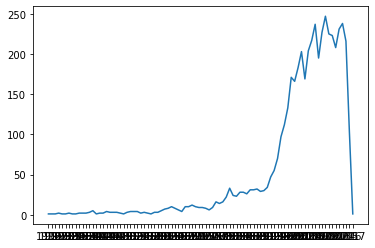

In [42]:
plt.plot(df.groupby('year').count()['id'])

In [43]:
df['year']

0       2009
1       2007
2       2015
3       2012
4       2012
        ... 
4798    1992
4799    2011
4800    2013
4801    2012
4802    2005
Name: year, Length: 4802, dtype: object

In [44]:
type(df['year'][1])

str

- 文字列になっているので、 lambda の戻り値を int(integer)にしてあげる

In [45]:
df = pd.read_csv('../Pandas/dataset/tmdb_5000_movies.csv')

In [46]:
# error 防止 filter NaN を取り去る / NOT 演算
df = df[~df['release_date'].isna()]

# 余計なものを省く(無名関数なので名前もいらない)
# df['year'] = df['release_date'].apply(lambda release_date: release_date[:4])

# lambda を短縮 (引数は　x　にしてしまう事が一般的)
df['year'] = df['release_date'].apply(lambda x: int(x[:4]))  # 型変換 int(整数)

df.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,year
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,2009


Text(0, 0.5, 'count')

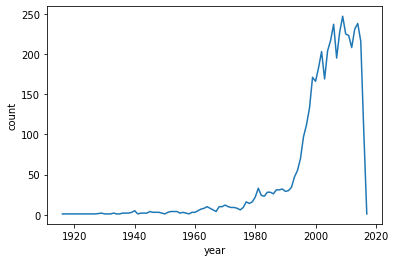

In [48]:
plt.plot(df.groupby('year').count()['id'])
plt.xlabel('year')
plt.ylabel('count')

- matplotlib　が　**数値項目として程よいところで区切ってくれる**
    - *str(文字列)だとの感覚がわからないので上記の図のようになって表示される*

## revenue の推移

In [51]:
# 0のものは排除 filter
df = df[df['revenue'] != 0]

In [52]:
df.groupby('year').median()['revenue']  # 各年(year)に対しての revenue の中央値

year
1916      8394751.0
1925     22000000.0
1927       650422.0
1929      4358000.0
1930      8000000.0
           ...     
2012     64793040.0
2013     63464861.0
2014     80383290.0
2015     84769058.0
2016    108286421.0
Name: revenue, Length: 89, dtype: float64

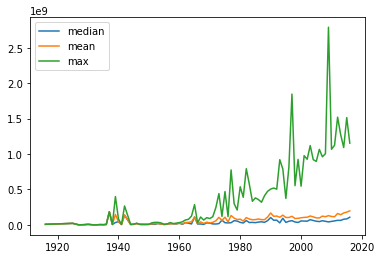

In [55]:
plt.plot(df.groupby('year').median()['revenue'], label='median')  # 中央値
plt.plot(df.groupby('year').mean()['revenue'], label='mean')      # 平均値
plt.plot(df.groupby('year')['revenue'].max(), label='max')        # 最大値 / yearのどの columns に対しての .max() なのか？
plt.legend()